In [1]:
import pandas as pd
import json 
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nba68 = pd.read_csv('nba1968.csv')
nba68.head()

,Player,Pos,Ht,Wt
0,NaN,NaN,NaN,NaN
1,Wilt Chamberlain\chambwi01,C,7-1,275.0
2,Larry Costello\costela01,PG,6-1,186.0
3,Billy Cunningham\cunnibi01,SF,6-6,210.0
4,Ron Filipek\filipro01,F,6-5,205.0


In [3]:
nba68[['Player']] = nba68.Player.str.split('\\', expand = True)[0]
nba68.head()

,Player,Pos,Ht,Wt
0,NaN,NaN,NaN,NaN
1,Wilt Chamberlain,C,7-1,275.0
2,Larry Costello,PG,6-1,186.0
3,Billy Cunningham,SF,6-6,210.0
4,Ron Filipek,F,6-5,205.0


In [4]:
nba68["Player"].value_counts().head()

Jim Caldwell       3
Barry Liebowitz    3
Erwin Mueller      2
Rubin Russell      2
Willie Porter      2
Name: Player, dtype: int64

In [5]:
nba68.drop_duplicates(subset=['Player'], keep=False)
nba68.head()

,Player,Pos,Ht,Wt
0,NaN,NaN,NaN,NaN
1,Wilt Chamberlain,C,7-1,275.0
2,Larry Costello,PG,6-1,186.0
3,Billy Cunningham,SF,6-6,210.0
4,Ron Filipek,F,6-5,205.0


In [6]:
nba1968 = nba68.drop(nba68.index[0])
nba1968.head()

,Player,Pos,Ht,Wt
1,Wilt Chamberlain,C,7-1,275.0
2,Larry Costello,PG,6-1,186.0
3,Billy Cunningham,SF,6-6,210.0
4,Ron Filipek,F,6-5,205.0
5,Johnny Green,PF,6-5,200.0


In [7]:
nba1968[['Ht','Ht(in)']] = nba1968['Ht'].str.split('-',expand=True)
nba1968.head()

,Player,Pos,Ht,Wt,Ht(in)
1,Wilt Chamberlain,C,7,275.0,1
2,Larry Costello,PG,6,186.0,1
3,Billy Cunningham,SF,6,210.0,6
4,Ron Filipek,F,6,205.0,5
5,Johnny Green,PF,6,200.0,5


In [8]:
nba1968[['Ht', 'Ht(in)']] = nba1968[['Ht', 'Ht(in)']].apply(pd.to_numeric, errors='coerce', axis=1)
nba1968.head()

,Player,Pos,Ht,Wt,Ht(in)
1,Wilt Chamberlain,C,7,275.0,1
2,Larry Costello,PG,6,186.0,1
3,Billy Cunningham,SF,6,210.0,6
4,Ron Filipek,F,6,205.0,5
5,Johnny Green,PF,6,200.0,5


In [9]:
nba1968['Ht'] = nba1968['Ht']*12
nba1968.head()

,Player,Pos,Ht,Wt,Ht(in)
1,Wilt Chamberlain,C,84,275.0,1
2,Larry Costello,PG,72,186.0,1
3,Billy Cunningham,SF,72,210.0,6
4,Ron Filipek,F,72,205.0,5
5,Johnny Green,PF,72,200.0,5


In [10]:
nba1968["Height(in)"] = nba1968["Ht"] + nba1968["Ht(in)"]
nba1968.rename(columns={"Pos" : "Position"}, inplace=True)
nba1968.head()

,Player,Position,Ht,Wt,Ht(in),Height(in)
1,Wilt Chamberlain,C,84,275.0,1,85
2,Larry Costello,PG,72,186.0,1,73
3,Billy Cunningham,SF,72,210.0,6,78
4,Ron Filipek,F,72,205.0,5,77
5,Johnny Green,PF,72,200.0,5,77


In [11]:
Avg_1968 = nba1968.groupby(["Position"]).mean()
avgnba68 = Avg_1968[["Height(in)", "Wt"]]
print("These are the average Height and Weight per postion for the 1968 NBA/ABA Season")
print(avgnba68)
print("----------------------------------------------------")
print("These are the averages per player for the 1968 NBA/ABA Season")
print(nba1968.mean())


These are the average Height and Weight per postion for the 1968 NBA/ABA Season
          Height(in)          Wt
Position                        
C          81.666667  226.433333
F          78.692308  211.666667
F-C        79.000000  218.000000
F-G        76.000000  200.000000
G          74.000000  185.333333
PF         79.354839  216.774194
PG         73.684211  182.929825
SF         77.896552  208.965517
SG         75.063492  189.841270
----------------------------------------------------
These are the averages per player for the 1968 NBA/ABA Season
Ht             72.220859
Wt            204.852308
Ht(in)          5.282209
Height(in)     77.503067
dtype: float64


In [12]:
avgnba68

,Height(in),Wt
Position,,
C,81.666667,226.433333
F,78.692308,211.666667
F-C,79.000000,218.000000
F-G,76.000000,200.000000
G,74.000000,185.333333
PF,79.354839,216.774194
PG,73.684211,182.929825
SF,77.896552,208.965517
SG,75.063492,189.841270


In [13]:
filepath3 = os.path.join("draftcombineplayeranthro.json")
with open(filepath3) as jsonfile:
    draft_json = json.load(jsonfile)

In [14]:
draft_json

{'parameters': {'LeagueID': '00', 'SeasonYear': '2018-19'},
 'resource': 'draftcombineplayeranthro',
 'resultSets': [{'headers': ['TEMP_PLAYER_ID',
    'PLAYER_ID',
    'FIRST_NAME',
    'LAST_NAME',
    'PLAYER_NAME',
    'POSITION',
    'HEIGHT_WO_SHOES',
    'HEIGHT_WO_SHOES_FT_IN',
    'HEIGHT_W_SHOES',
    'HEIGHT_W_SHOES_FT_IN',
    'WEIGHT',
    'WINGSPAN',
    'WINGSPAN_FT_IN',
    'STANDING_REACH',
    'STANDING_REACH_FT_IN',
    'BODY_FAT_PCT',
    'HAND_LENGTH',
    'HAND_WIDTH'],
   'name': 'Results',
   'rowSet': [[1628959,
     1628959,
     'Rawle',
     'Alkins',
     'Rawle Alkins',
     'SG',
     74.75,
     "6' 2.75''",
     76.25,
     "6' 4.25''",
     '217.4',
     80.75,
     "6' 8.75''",
     99.0,
     "8' 3''",
     8.9,
     8.5,
     10.0],
    [1628960,
     1628960,
     'Grayson',
     'Allen',
     'Grayson Allen',
     'SG',
     75.0,
     "6' 3''",
     76.5,
     "6' 4.5''",
     '198',
     79.25,
     "6' 7.25''",
     97.0,
     "8' 1''",
     5.

In [15]:
df3 = pd.DataFrame.from_dict(draft_json['resultSets'][0]['rowSet'], orient='columns')

In [16]:
table3 = df3
table3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1628959,1628959,Rawle,Alkins,Rawle Alkins,SG,74.75,6' 2.75'',76.25,6' 4.25'',217.4,80.75,6' 8.75'',99.0,8' 3'',8.90,8.50,10.00
1,1628960,1628960,Grayson,Allen,Grayson Allen,SG,75.00,6' 3'',76.50,6' 4.5'',198,79.25,6' 7.25'',97.0,8' 1'',5.55,8.25,10.00
2,1628961,1628961,Kostas,Antetokounmpo,Kostas Antetokounmpo,PF,81.00,6' 9'',82.50,6' 10.5'',194.8,86.25,7' 2.25'',110.0,9' 2'',5.00,9.25,9.50
3,1628962,1628962,Udoka,Azubuike,Udoka Azubuike,C,82.00,6' 10'',84.25,7' 0.25'',273.8,91.00,7' 7'',112.5,9' 4.5'',7.95,9.50,10.00
4,1628964,1628964,Mohamed,Bamba,Mohamed Bamba,C,83.25,6' 11.25'',84.75,7' 0.75'',225.6,94.00,7' 10'',115.5,9' 7.5'',6.20,9.75,10.25


In [17]:
table3 = df3[[4, 5, 6, 8, 10, 11]]
table3.columns = ['Name', 'Position', 'Height(in) w/o Shoes', 'Height w/ Shoes', 'Weight', 'Wingspan']
table3.head(10)

,Name,Position,Height(in) w/o Shoes,Height w/ Shoes,Weight,Wingspan
0,Rawle Alkins,SG,74.75,76.25,217.4,80.75
1,Grayson Allen,SG,75.00,76.50,198,79.25
2,Kostas Antetokounmpo,PF,81.00,82.50,194.8,86.25
3,Udoka Azubuike,C,82.00,84.25,273.8,91.00
4,Mohamed Bamba,C,83.25,84.75,225.6,94.00
5,Jaylen Barford,PG-SG,73.25,74.25,207.6,75.50
6,Keita Bates-Diop,SG-SF,79.25,80.50,223.8,87.25
7,Tyus Battle,SG,77.00,78.75,200.2,81.00
8,Brian Bowen,SG-SF,78.25,79.50,202,82.25
9,Miles Bridges,SF,77.25,78.75,220.4,81.50


In [18]:
table3.dtypes
table3[['Weight']] = table3[['Weight']].apply(pd.to_numeric, errors='coerce', axis=1)
table3.head()

C:\Users\pinkp\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Name,Position,Height(in) w/o Shoes,Height w/ Shoes,Weight,Wingspan
0,Rawle Alkins,SG,74.75,76.25,217.4,80.75
1,Grayson Allen,SG,75.00,76.50,198.0,79.25
2,Kostas Antetokounmpo,PF,81.00,82.50,194.8,86.25
3,Udoka Azubuike,C,82.00,84.25,273.8,91.00
4,Mohamed Bamba,C,83.25,84.75,225.6,94.00


In [19]:
table3['Position']=table3['Position'].replace(to_replace='C-PF', value='F-C')
table3['Position']=table3['Position'].replace(to_replace='PF-C', value='F-C')
table3['Position']=table3['Position'].replace(to_replace='SG-SF', value='F-G')
table3['Position']=table3['Position'].replace(to_replace='PG-SG', value='G')
table3['Position']=table3['Position'].replace(to_replace='SF-PF', value='F')
table3['Position']=table3['Position'].replace(to_replace='SF-SG', value='F-G')
table3['Position']=table3['Position'].replace(to_replace='SG-PG', value='G')

C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [20]:
nbacombine2018 = table3.groupby(["Position"]).mean()
combine_height2018 = nbacombine2018[["Height(in) w/o Shoes", "Height w/ Shoes", "Weight"]]
combine_height2018

,Height(in) w/o Shoes,Height w/ Shoes,Weight
Position,,,
C,81.928571,83.357143,254.485714
F,81.500000,82.750000,211.000000
F-C,80.964286,82.214286,240.628571
F-G,77.075000,78.400000,204.800000
G,74.750000,75.850000,197.160000
PF,79.571429,80.821429,216.171429
PG,73.307692,74.557692,188.076923
SF,78.250000,79.500000,209.280000
SG,75.767857,77.089286,199.942857


In [21]:
positions = pd.merge(combine_height2018, avgnba68, how='outer', left_index=True, right_index=True)
positions = positions.rename(columns={
    "Height w/ Shoes" : "Height 2018",
    "Height(in)" : "Height 1968",
    "Weight": "Weight 2018",
    "Wt" : "Weight 1968"
})
positions

,Height(in) w/o Shoes,Height 2018,Weight 2018,Height 1968,Weight 1968
Position,,,,,
C,81.928571,83.357143,254.485714,81.666667,226.433333
F,81.500000,82.750000,211.000000,78.692308,211.666667
F-C,80.964286,82.214286,240.628571,79.000000,218.000000
F-G,77.075000,78.400000,204.800000,76.000000,200.000000
G,74.750000,75.850000,197.160000,74.000000,185.333333
PF,79.571429,80.821429,216.171429,79.354839,216.774194
PG,73.307692,74.557692,188.076923,73.684211,182.929825
SF,78.250000,79.500000,209.280000,77.896552,208.965517
SG,75.767857,77.089286,199.942857,75.063492,189.841270


In [22]:
height = positions[["Height 2018", "Height 1968"]]
height

,Height 2018,Height 1968
Position,,
C,83.357143,81.666667
F,82.750000,78.692308
F-C,82.214286,79.000000
F-G,78.400000,76.000000
G,75.850000,74.000000
PF,80.821429,79.354839
PG,74.557692,73.684211
SF,79.500000,77.896552
SG,77.089286,75.063492


In [23]:
weight = positions[["Weight 2018", "Weight 1968"]]
weight

,Weight 2018,Weight 1968
Position,,
C,254.485714,226.433333
F,211.000000,211.666667
F-C,240.628571,218.000000
F-G,204.800000,200.000000
G,197.160000,185.333333
PF,216.171429,216.774194
PG,188.076923,182.929825
SF,209.280000,208.965517
SG,199.942857,189.841270


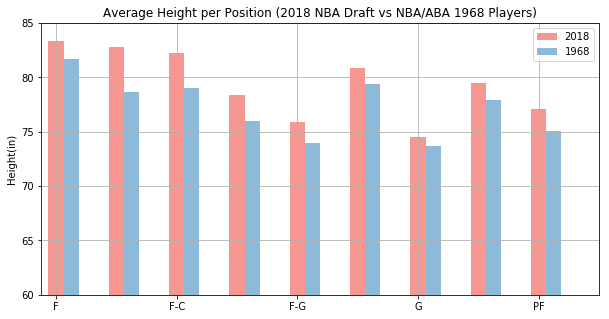

In [24]:
pos = list(range(len(height.index)))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, height["Height 2018"], width, alpha=0.5, color='#EE3224', label=height.index)
plt.bar([p + width for p in pos], height["Height 1968"], width, alpha=0.5, label=height.index)
ax.set_ylabel("Height(in)")
ax.set_title("Average Height per Position (2018 NBA Draft vs NBA/ABA 1968 Players)")
ax.set_xticklabels(height.index)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([60,85])

plt.legend(['2018', '1968'], loc='best')
plt.grid()
plt.show()

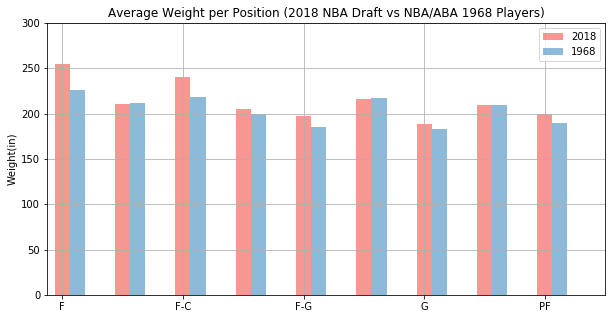

In [25]:
pos = list(range(len(weight.index)))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, weight["Weight 2018"], width, alpha=0.5, color='#EE3224', label=height.index)
plt.bar([p + width for p in pos], weight["Weight 1968"], width, alpha=0.5, label=height.index)
ax.set_ylabel("Weight(in)")
ax.set_title("Average Weight per Position (2018 NBA Draft vs NBA/ABA 1968 Players)")
ax.set_xticklabels(weight.index)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,300])

plt.legend(['2018', '1968'], loc='best')
plt.grid()
plt.show()

In [26]:
avgnba = pd.DataFrame([[2018, 2008, 1996, 1968], [79.089552, 78.996875, 79.092652, 77.503067], [219.611940, 222.196875, 222.134185, 204.852308]])

In [27]:
nba_avg = avgnba.transpose()
nba_avg.columns = ['Year', 'Height', 'Weight']
nba_avg

,Year,Height,Weight
0,2018.0,79.089552,219.611940
1,2008.0,78.996875,222.196875
2,1996.0,79.092652,222.134185
3,1968.0,77.503067,204.852308


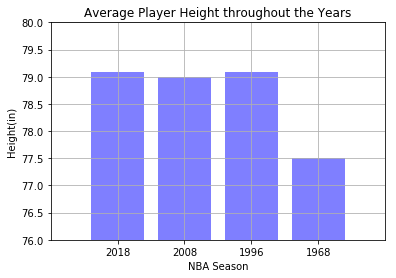

In [28]:
Year = ["2018", "2008", "1996", "1968"]
x_axis = np.arange(len(nba_avg["Year"]))
plt.bar(x_axis, nba_avg["Height"], color='blue', alpha=0.5, tick_label=Year)
plt.xlim(-1, len(x_axis))
plt.ylim(76, 80)
plt.title("Average Player Height throughout the Years")
plt.xlabel("NBA Season")
plt.ylabel("Height(in)")
plt.grid()